In [6]:
# %load housing_1.py
import numpy as np

# load data
train_data = np.loadtxt("boston_train.csv", delimiter=",")
test_data = np.loadtxt("boston_test.csv", delimiter=",")
X_train, t_train = train_data[:,:-1], train_data[:,-1]
X_test, t_test = test_data[:,:-1], test_data[:,-1]
# make sure that we have N-dimensional Numpy arrays (ndarray)
t_train = t_train.reshape((len(t_train), 1))
t_test = t_test.reshape((len(t_test), 1))
print("Number of training instances: %i" % X_train.shape[0])
print("Number of test instances: %i" % X_test.shape[0])
print("Number of features: %i" % X_train.shape[1])

# (a) compute mean of prices on training set

# (b) RMSE function
# def rmse(t, tp):
#     ...

# (c) visualization of results



Number of training instances: 253
Number of test instances: 253
Number of features: 13


## Exercise 1a

Mean of training set: 22.016600790513834
Root Mean Square Error: 9.672477972746305


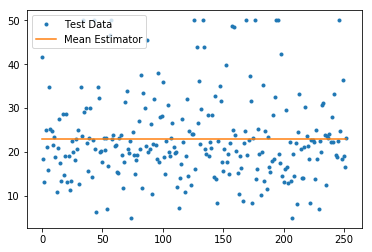

In [12]:
# Calculates the mean and returns an array of the same length
# as the input, filled with the mean
def meanEst(data):
    return np.full((len(data),1),np.mean(data))

print("Mean of training set: {}".format(meanEst(t_train)[0,0]))

# (b) RMSE function
def rmse(t, tp):
    return np.sqrt(1/len(t)*np.sum(abs(t-tp)**2))

print("Root Mean Square Error: {}".format(rmse(t_test, meanEst(t_train))))

# (c) visualization of results
plt.plot(t_test, linestyle='none', marker='.', label='Test Data')
plt.plot(meanEst(t_test), label='Mean Estimator')
plt.legend()
plt.show()

## Exercise 2a

In [10]:
# %load housing_2.py
import numpy
import pandas
import linreg
import matplotlib.pyplot as plt

# load data
train_data = numpy.loadtxt("boston_train.csv", delimiter=",")
test_data = numpy.loadtxt("boston_test.csv", delimiter=",")
X_train, t_train = train_data[:,:-1], train_data[:,-1]
X_test, t_test = test_data[:,:-1], test_data[:,-1]
# make sure that we have N-dimensional Numpy arrays (ndarray)
t_train = t_train.reshape((len(t_train), 1))
t_test = t_test.reshape((len(t_test), 1))
print("Number of training instances: %i" % X_train.shape[0])
print("Number of test instances: %i" % X_test.shape[0])
print("Number of features: %i" % X_train.shape[1])

# (a) fit linear regression using only the first feature
model_single = linreg.LinearRegression()
model_single.fit(X_train[:,0], t_train)

# (b) fit linear regression model using all features

# (c) evaluation of results



Number of training instances: 253
Number of test instances: 253
Number of features: 13
